# Explainable AI (XAI) - Feature Importance and Partial Dependence Plot (PDP)

# Importing Libraries

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
import matplotlib.lines as mlines

import warnings
warnings.filterwarnings("ignore")

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline


# Loading Dataset

In [2]:
# Uploading saved dataframe csv file from google drive
! gdown --id 1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX
From (redirected): https://drive.google.com/uc?id=1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX&confirm=t&uuid=a934d5b6-7a6b-447e-bbbc-5ea307ffb350
To: /content/df_1.csv
100% 788M/788M [00:10<00:00, 74.4MB/s]


In [3]:
%%time
# Load Data
df   = pd.read_csv('/content/df_1.csv')

CPU times: user 23 s, sys: 8.37 s, total: 31.4 s
Wall time: 31.6 s


In [4]:
df.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V

In [5]:
# Reduce the number of rows
df = df.sample(frac=0.3, random_state=42)

# Check the shape of the reduced DataFrame
df.shape

(177162, 534)

# Model Building

In [6]:
# Split the y variable series and X variables dataset
X = df.drop(['isFraud'],axis=1)
y = df.isFraud.astype(bool)

In [7]:
# Split the dataset into the training set and test set
from   sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [8]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(124013, 533) (124013,)
(53149, 533) (53149,)


In [9]:
# Head of X_train
X_train.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_miss

Handling Missing Values - Imputation

In [10]:
from sklearn.impute import KNNImputer, SimpleImputer

# replace inf
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Impute
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = KNNImputer(n_neighbors=3)

X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_miss

In [22]:
!pip install -U scikit-learn


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import classification_report
from sklearn.metrics  import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics  import roc_auc_score
# from sklearn.metrics  import plot_roc_curve
from sklearn.metrics import precision_recall_curve
# from sklearn.metrics  import plot_precision_recall_curve

In [26]:
from sklearn.metrics import roc_curve, auc

def manual_plot_roc_curve(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


In [27]:
from sklearn.metrics import precision_recall_curve

def manual_plot_precision_recall_curve(y_true, y_prob):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='purple', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid()
    plt.show()


In [31]:

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("Accuracy Score: ", accuracy_score(y_actual, y_predicted))
    print("AUC - ROC Score: ", roc_auc_score(y_actual, y_predicted_prob))
    print("\nClassification Report:\n", classification_report(y_actual, y_predicted))
    print("\nConfusion Matrix:\n", confusion_matrix(y_actual, y_predicted))

    # Custom Confusion Matrix Plot
    print("\nConfusion Matrix Plot:")
    plot_custom_confusion_matrix(y_actual, y_predicted)

    # AUC - ROC Curve
    print("\nAUC - ROC Curve:")
    manual_plot_roc_curve(y_actual, y_predicted_prob)

    # Precision-Recall Curve
    print("\nPrecision-Recall Curve:")
    manual_plot_precision_recall_curve(y_actual, y_predicted_prob)

def plot_custom_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()


## Model Fitting

In [49]:
%%time
# Define the model
from lightgbm import LGBMClassifier
lgbc = LGBMClassifier(random_state=42, max_depth=20, n_estimators=100, num_leaves=256)

# Train the model
lgbc.fit(X_train_imputed,y_train)

lgbc

[LightGBM] [Info] Number of positive: 4386, number of negative: 119627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.443624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19167
[LightGBM] [Info] Number of data points in the train set: 124013, number of used features: 501
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035367 -> initscore=-3.305961
[LightGBM] [Info] Start training from score -3.305961
CPU times: user 24.5 s, sys: 190 ms, total: 24.7 s
Wall time: 27.3 s


LGBMClassifier(max_depth=20, num_leaves=256, random_state=42)

In [50]:
# Impute X_Test before predicting
X_test_imputed = imputer.transform(X_test)

# Prediction
y_pred_lgbc = lgbc.predict(X_test_imputed)
y_prob_pred_lgbc = lgbc.predict_proba(X_test_imputed)
y_prob_pred_lgbc = [x[1] for x in y_prob_pred_lgbc]
print("Y predicted : ",y_pred_lgbc)
print("Y probability predicted : ",y_prob_pred_lgbc[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted :  [0.0024768014074784527, 0.003520348835805541, 0.0011615558962248854, 0.003266946537126845, 0.0005196884423379668]


## Model Evaluation

Accuracy Score:  0.9783062710493142
AUC - ROC Score:  0.9323734988525169

Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99     51194
        True       0.91      0.45      0.61      1955

    accuracy                           0.98     53149
   macro avg       0.95      0.73      0.80     53149
weighted avg       0.98      0.98      0.97     53149


Confusion Matrix:
 [[51109    85]
 [ 1068   887]]

Confusion Matrix Plot:


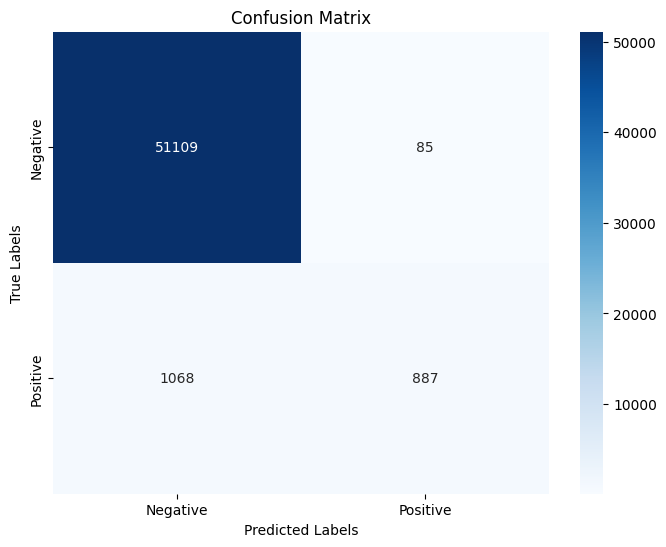


AUC - ROC Curve:


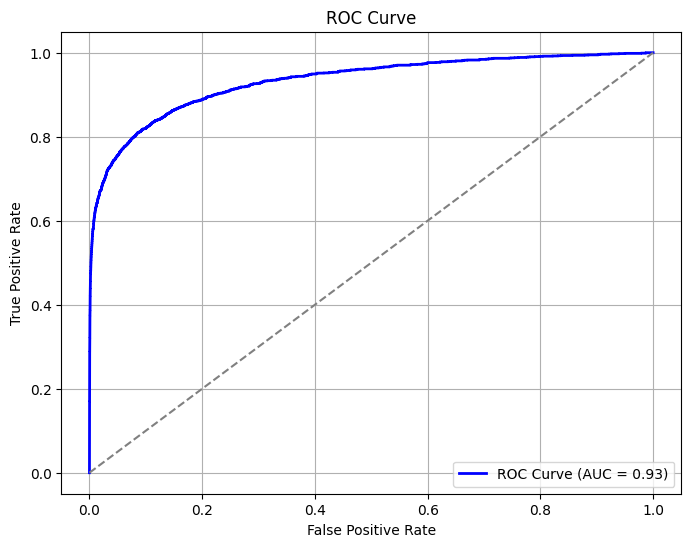


Precision-Recall Curve:


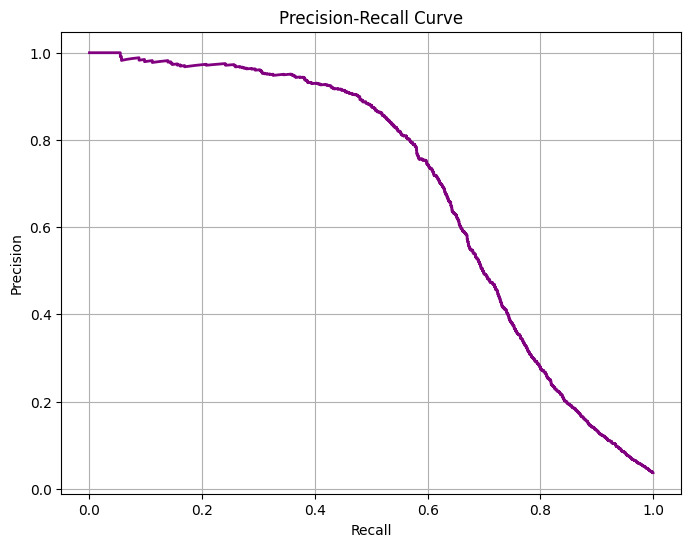

In [51]:
# Compute Evaluation Metric
compute_evaluation_metric(lgbc, X_test_imputed, y_test, y_pred_lgbc, y_prob_pred_lgbc)

# Feature Importance

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [52]:
lgbc.feature_importances_

array([ 343,   63, 1204,  905,  113,  104,  391,  140,  777,   16,  411,
        386,  164,  307,  243,   10,   40,   76,  149,   10,   69,  130,
         58,  177,   67,  393,  181,  284,  239,  212,  265,  145,   46,
        230,  107,  242,  171,   33,   38,   84,  293,    1,   27,   53,
         97,   91,  104,   40,   34,   49,  117,  390,   35,    7,  148,
        129,   22,    2,   28,   10,  130,   57,   19,   17,   28,  220,
        301,    6,    2,   31,   79,   24,  117,    7,    2,    2,    6,
         42,   20,  244,   27,    0,    0,   12,    0,    0,    0,   23,
         18,   13,    0,    0,   16,   11,    2,   10,    5,    4,    0,
          0,    1,    1,    3,    2,    3,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [53]:
feature_importance_df = pd.DataFrame({'feature' : X_train_imputed.columns, 'importance' : lgbc.feature_importances_ })

In [54]:
feature_importance_df = feature_importance_df.head(15).sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:30,:]
feature_importance_df

,feature,importance
2,card1,1204
3,card2,905
8,addr1,777
10,dist1,411
6,card5,391
11,P_emaildomain,386
0,TransactionAmt,343
13,C1,307
14,C2,243
12,R_emaildomain,164


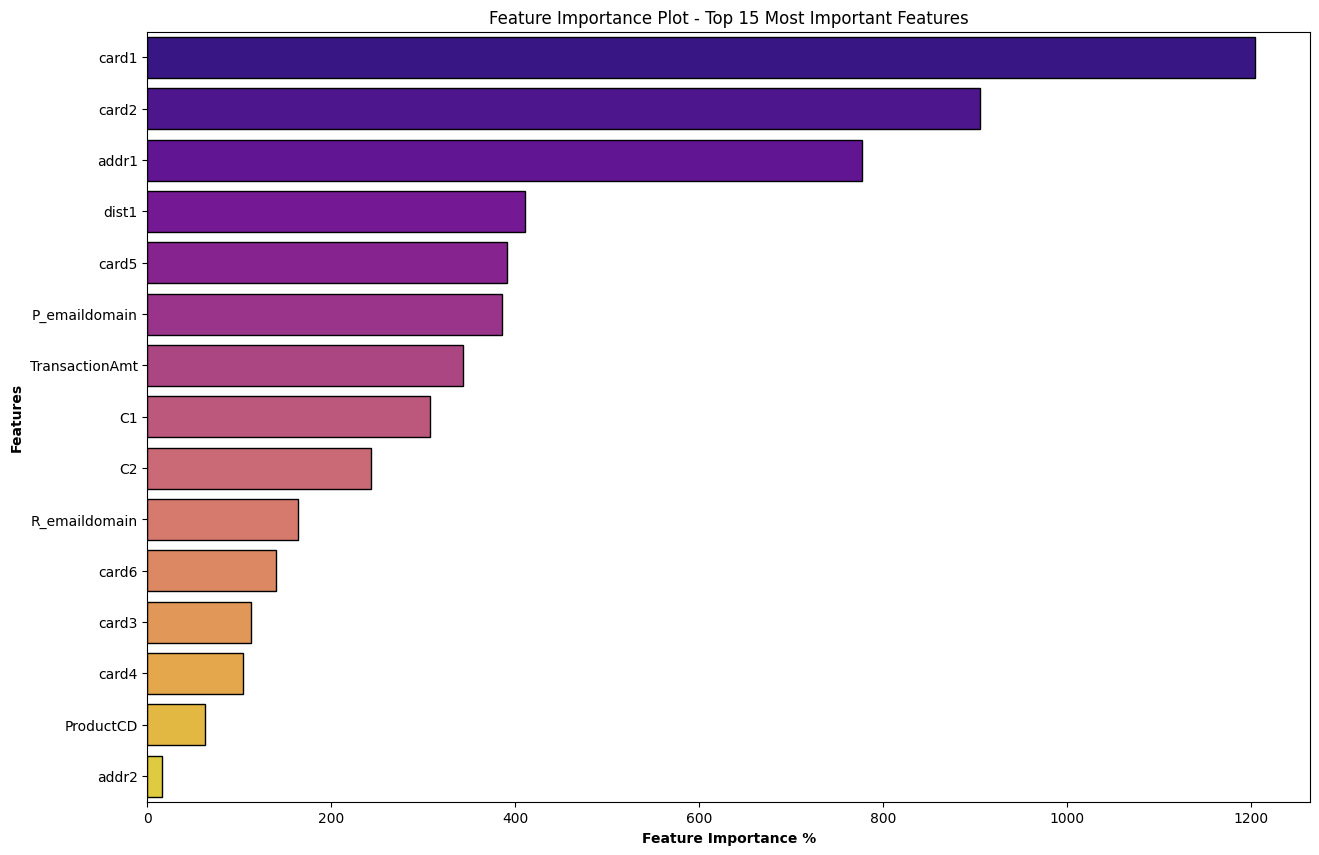

In [55]:
plt.figure(figsize=(15, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.head(15).sort_values(by="importance", ascending=False),
            palette= 'plasma',edgecolor = 'black',linewidth = 1);
plt.title('Feature Importance Plot - Top 15 Most Important Features')
plt.xlabel('Feature Importance %',weight='bold')
plt.ylabel('Features',weight='bold');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- card1 is contributing the most in predicting if a financial transaction is fraud or legitimate
- card2, addr1, P_emaildomain, etc are some of the most important features in predicting the fraud
- Certain card types, addresses and emails are at high risk of fraud, so there is a need to monitor these carefully

# Partial Dependence Plot (PDP)


- While feature importance shows what variables/features most affect predictions, Partial Dependence Plots (PDP) shows how a feature affects predictions.

- PDP is a useful tool for gaining insights into the relationship between features and predictions. It helps us understand how different values of a particular feature impact model’s predictions.

- For Example, what impact do longitude and latitude have on house prices? To restate this, how would similarly sized houses be priced in different areas?

- PDP is a global method, it takes into account all instances and makes a statement about the global relationship of a feature with the predicted outcome.

- One of the main advantage of PDP is that it can be used to interpret the result of any "black box" learning methods.
PDP can be quite computationally expensive when the data set becomes large.






In [56]:
## pdp plots

# # from sklearn.inspection import partial_dependence, plot_partial_dependence
# from sklearn.inspection import plot_partial_dependence

# from sklearn.utils import validation

from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt

In [57]:
from sklearn.utils.validation import check_is_fitted

# Fit the Model
lgbc.fit(X_train_imputed, y_train)

# Adding a dummy attribute to the model (optional)
lgbc.dummy_ = "dummy"

# Check if the model is fitted
check_is_fitted(estimator=lgbc)


[LightGBM] [Info] Number of positive: 4386, number of negative: 119627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.421727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19167
[LightGBM] [Info] Number of data points in the train set: 124013, number of used features: 501
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035367 -> initscore=-3.305961
[LightGBM] [Info] Start training from score -3.305961


## PDP - Card1

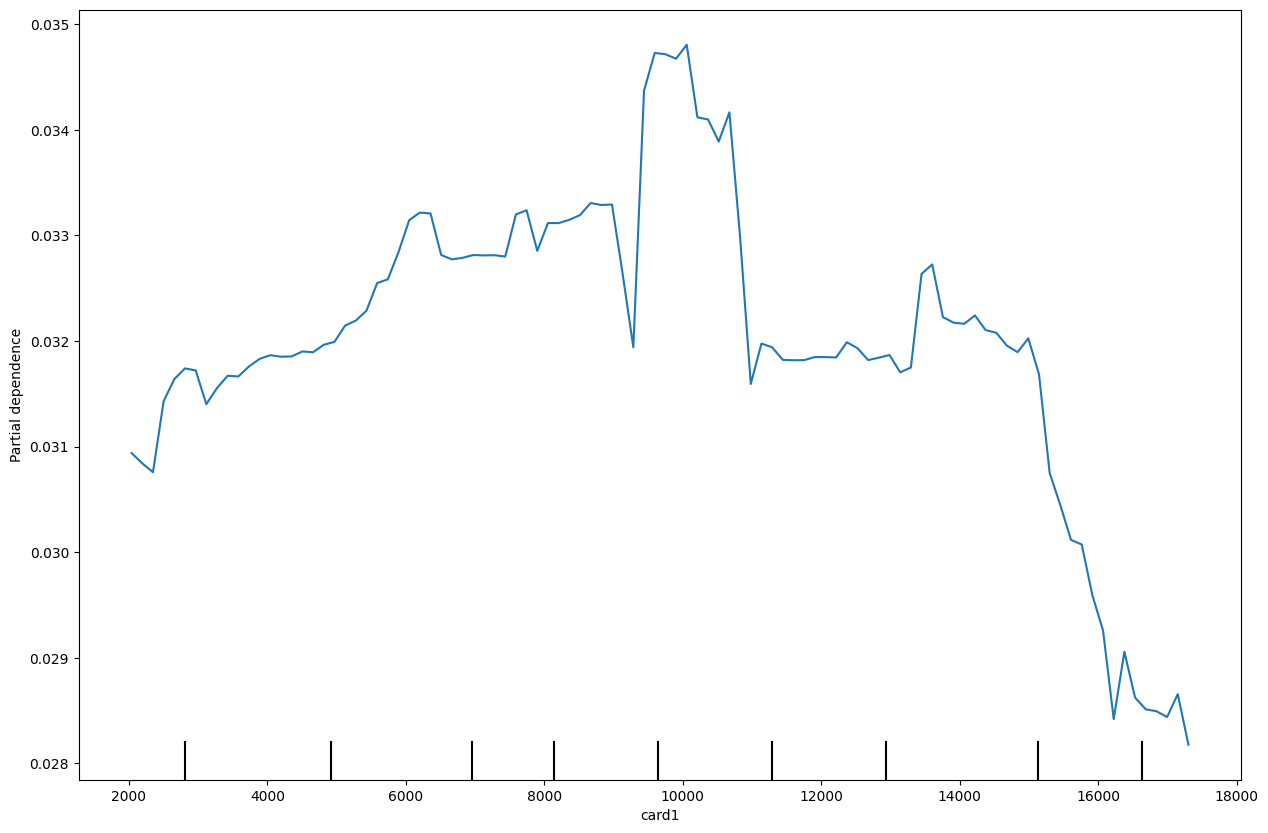

In [58]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Plotting PDP Plot for 'card1'
PartialDependenceDisplay.from_estimator(lgbc, X_train_imputed, features=['card1'])
plt.show()


**Inferences:**

- X axis is feature/variable that is required to predict the target feature
- Y axis is interpreted as 'change in the prediction' from what it would be predicted at the baseline or leftmost value.


- In the plot above, vertical axis (Y-axis) shows the predicted probability and horizontal axis (X-axis) shows card1 values.

- The blue line captures how average predicted probability changes as the card1 values change.



- The Average Probability of financial transaction is fraud decreases when card1 value lies in range between 12000 to 16000 i.e the possibility of transaction being fraud is lower when card1 value is higher
- The Average Probability of financial transaction is fraud increases as card1 value lies in range between 10000 to 12000 i.e the possibility of transaction being fraud is higher when card1 value is lower

## PDP - Card2

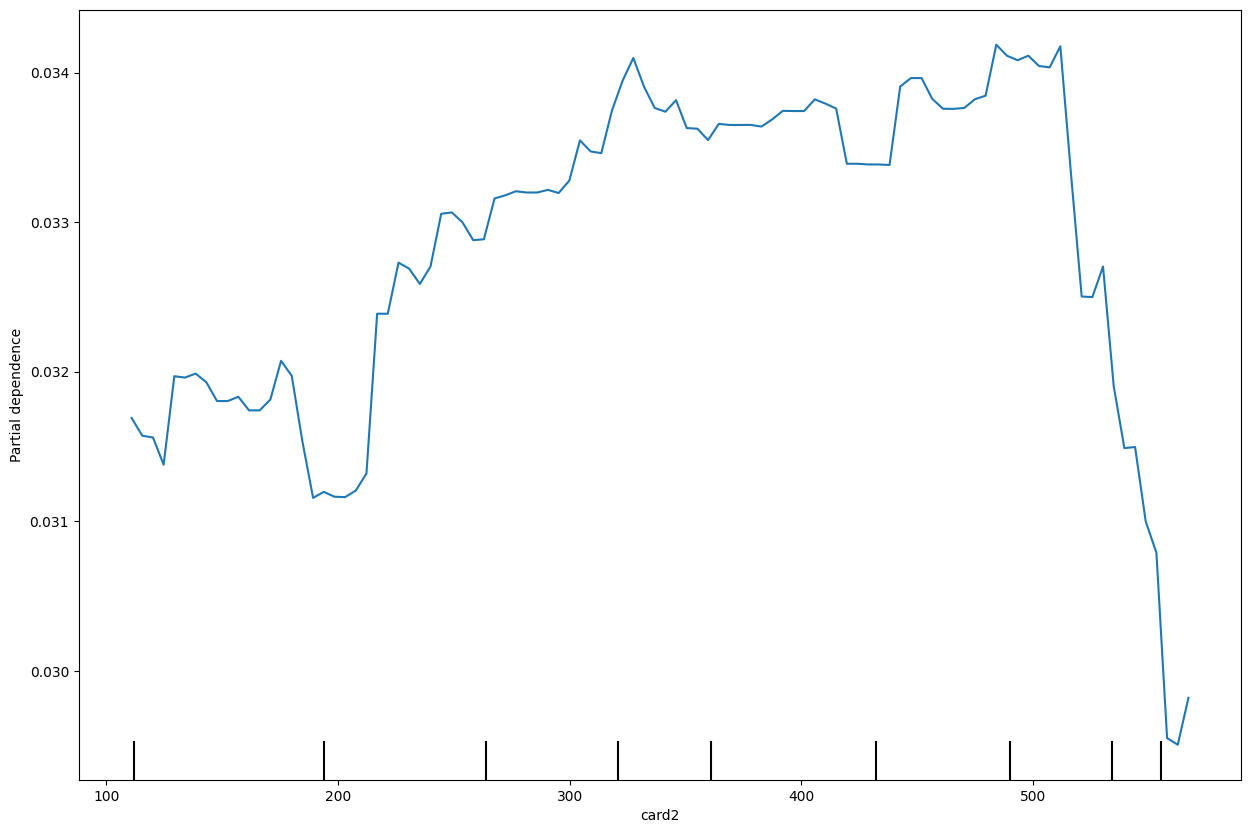

In [59]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Plotting PDP Plot for 'card2'
PartialDependenceDisplay.from_estimator(lgbc, X_train_imputed, features=['card2'])
plt.show()


**Inferences:**

1.   The Average Probability of financial transaction is fraud decreases when card2 value lies in range between 100 to 200 i.e the possibility of transaction being fraud is lower when card2 value is lower
2.   The Average Probability of financial transaction is fraud increases when card2 value lies in range between 450 to 500 i.e the possibility of transaction being fraud is higher when card2 value is higher

## PDP - Card5

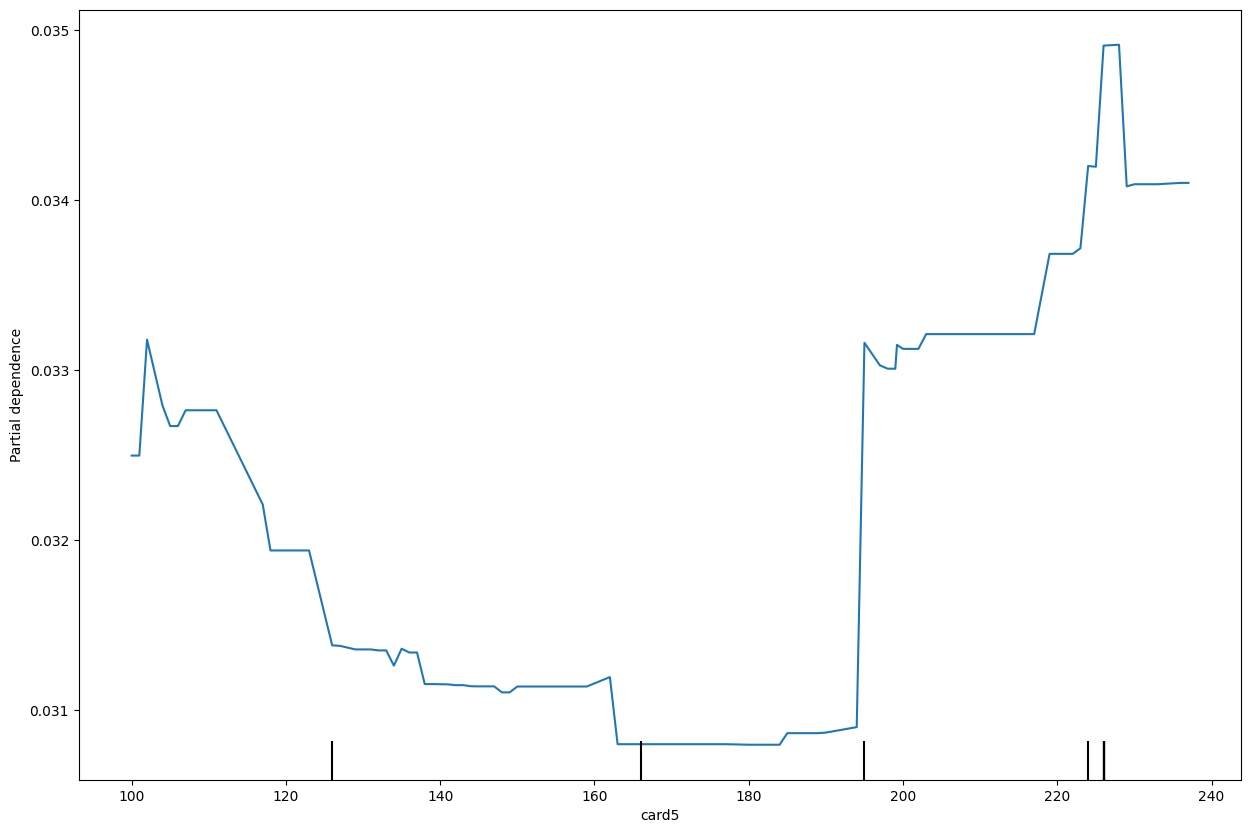

In [60]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Plotting PDP Plot for 'card5'
PartialDependenceDisplay.from_estimator(lgbc, X_train_imputed, features=['card5'])
plt.show()

**Inferences:**

1.   The Average Probability of financial transaction is fraud decreases when card2 value lies in range between 100 to 200 i.e the possibility of transaction being fraud is lower when card2 value is lower
2.   The Average Probability of financial transaction is fraud increases when card2 value lies in range between 450 to 500 i.e the possibility of transaction being fraud is higher when card2 value is higher

## PDP - addr1

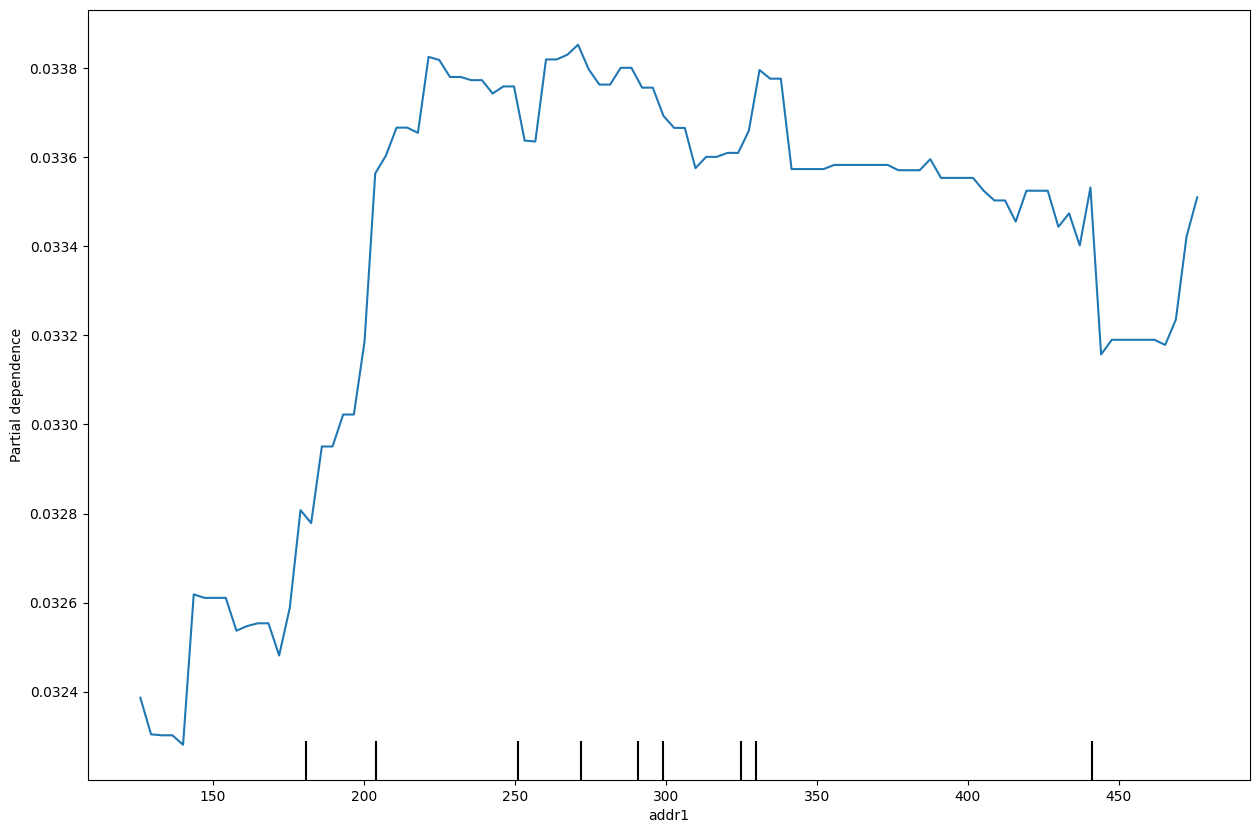

CPU times: user 4min 26s, sys: 10.7 s, total: 4min 37s
Wall time: 4min 53s


In [61]:
%%time
#Plotting PDP Plot for 'addr1'
PartialDependenceDisplay.from_estimator(lgbc, X_train_imputed, features=['addr1'])
plt.show()

**Inferences:**

1.   The Average Probability of financial transaction is fraud decreases when addr1 value lies in range between 100 to 175 i.e the possibility of transaction being fraud is lower when card2 value is lower
2.   The Average Probability of financial transaction is fraud increases when addr1 value lies in range between 200 to 425 i.e the possibility of transaction being fraud is higher when addr1 value is higher

## PDP - P_emaildomain

CPU times: user 4min 43s, sys: 630 ms, total: 4min 44s
Wall time: 1min 35s


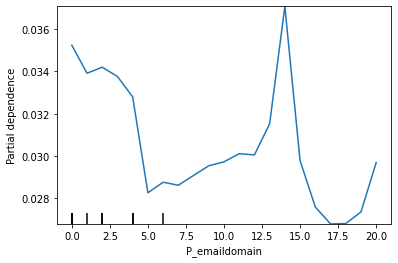

In [ ]:
%%time
#Plotting PDP Plot for 'P_emaildomain'
PartialDependenceDisplay.from_estimator(lgbc, X_train_imputed, features=['P_emaildomain'])
plt.show()

**Inferences:**

1.   The Average Probability of financial transaction is fraud decreases when P_emaildomain value lies in range between 15 to 17.5 i.e the possibility of transaction being fraud is lower when P_emaildomain is lower
2.   The Average Probability of financial transaction is fraud increases when P_emaildomain value lies in range between 10 to 15 i.e the possibility of transaction being fraud is higher when P_emaildomain value is higher

## PDP - TransactionAmt

CPU times: user 22min 49s, sys: 2.88 s, total: 22min 52s
Wall time: 7min 45s


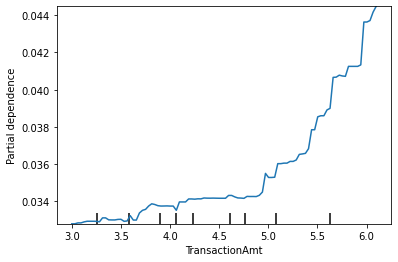

In [ ]:
%%time
#Plotting PDP Plot for 'TransactionAmt'
PartialDependenceDisplay.from_estimator(lgbc, X_train_imputed, features=['TransactionAmt'])
plt.show()

**Inferences:**


The Average Probability of financial transaction is fraud increases when TransactionAmt value lies in range between 3 to 6 i.e the possibility of transaction being fraud is higher when TransactionAmt is higher

## PDP - Mutliple Features

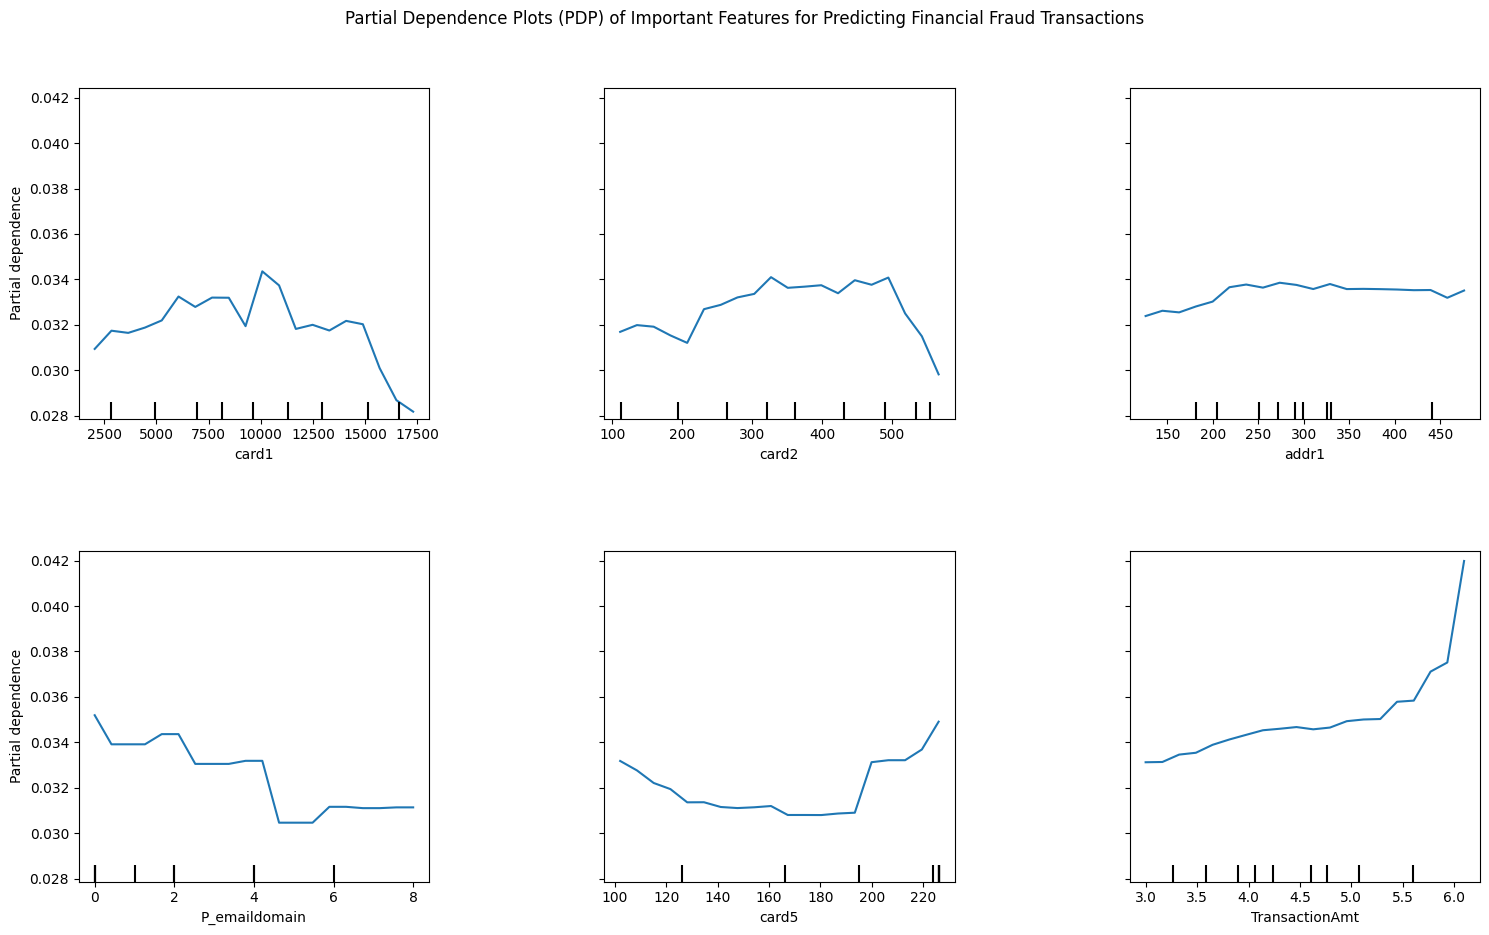

CPU times: user 5min 16s, sys: 13.3 s, total: 5min 29s
Wall time: 5min 33s


In [64]:

%%time
# PDP Plots for Multiple Features
features = ['card1', 'card2', 'addr1', 'P_emaildomain', 'card5', 'TransactionAmt']
fig, ax = plt.subplots(figsize=(15, 10))

# Using PartialDependenceDisplay.from_estimator() instead of plot_partial_dependence
PartialDependenceDisplay.from_estimator(lgbc, X_train_imputed, features=features, grid_resolution=20, ax=ax)

# Adjusting the figure size and title
fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.suptitle('Partial Dependence Plots (PDP) of Important Features for Predicting Financial Fraud Transactions')
fig.subplots_adjust(wspace=0.5, hspace=0.4)
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

plt.show()


In [66]:
## pdp plots
# from sklearn.inspection import partial_dependence, plot_partial_dependence
from sklearn.utils import validation

In [67]:
lgbc.fit(X_train_imputed, y_train)
lgbc.dummy_ = "dummy"
validation.check_is_fitted(estimator=lgbc)

[LightGBM] [Info] Number of positive: 4386, number of negative: 119627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.656330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19167
[LightGBM] [Info] Number of data points in the train set: 124013, number of used features: 501
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035367 -> initscore=-3.305961
[LightGBM] [Info] Start training from score -3.305961


CPU times: user 5min 15s, sys: 13.3 s, total: 5min 28s
Wall time: 5min 32s


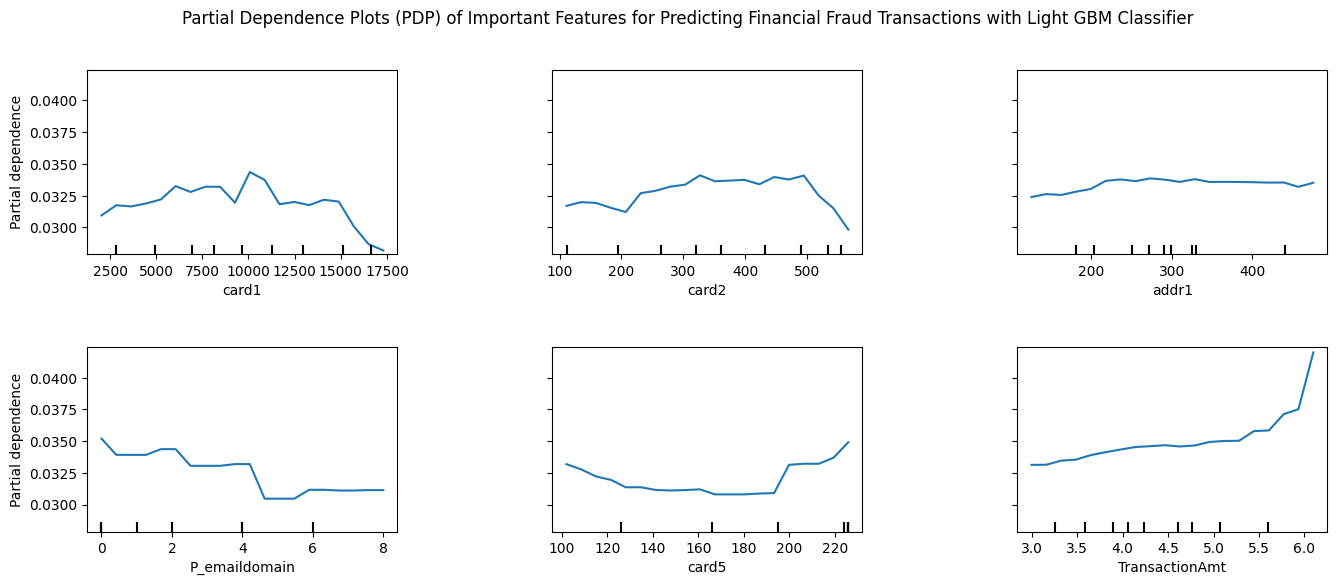

In [68]:
%%time
from sklearn.inspection import PartialDependenceDisplay

common_params = {
    #"subsample": 1000,
    "grid_resolution": 20,
    #"centered": True,
    "random_state": 42,
}

_, ax = plt.subplots(ncols= 3, nrows= 2, figsize=(16, 6))
display = PartialDependenceDisplay.from_estimator(lgbc,
    X_train_imputed,
    features=['card1','card2','addr1','P_emaildomain','card5','TransactionAmt'],
    kind="average",ax = ax,
   **common_params,
)

display.figure_.suptitle(
    "Partial Dependence Plots (PDP) of Important Features for Predicting Financial Fraud Transactions with Light GBM Classifier"
)

display.figure_.subplots_adjust(wspace=0.5, hspace=0.5)

